In [26]:
import pandas as pd  # manipulation des donnees
import numpy as np   # calculs mathématiques
import seaborn as sns   # visualiser les données
import matplotlib.pyplot as plt  # visualisation
import scipy as scipy   # faire des statistiques et des probabilités
import sys
import os
from timeit import default_timer as timer
from datetime import datetime, timedelta
from colorama import Fore
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
sys.path.append(os.path.abspath("../utils"))
import utils

# Chargement dataset

In [15]:
fichier="../data/MP.csv"
data = pd.read_csv(fichier, delimiter=";", dtype={
	"age": float,
    "job": "category",
    "marital": "category",
    "education": "category",
    "default": "category",
    "housing": "category",
    "loan": "category",
    "contact": "category",
    "month": "category",
    "day_of_week": "category",
    "duration": float,
    "campaign": float,
    "pdays": float,
    "previous": float,
    "poutcome": "category",
    "emp.var.rate": float,
    "cons.price.idx": float,
    "cons.conf.idx": float,
    "euribor3m": float,
	"nr.employed": float,
    "y": "category"
})

In [14]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [1]:
from pandas_profiling import ProfileReport
resultats = ProfileReport(data, title="Pandas Profiling Report")



ImportError: cannot import name 'ABCIndexClass' from 'pandas.core.dtypes.generic' (C:\Users\alexi\anaconda3\envs\4MLSP\lib\site-packages\pandas\core\dtypes\generic.py)

In [ ]:
resultats.to_file('report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 48.77it/s]


In [ ]:
data.shape # 41k lignes de données, et 21 propriétés d'infos

(41188, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data.isna().sum() # Nous n'avons aucunes données manquantes

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
nb_data=data.shape[1]*data.shape[0]
nb_data

864948

In [ ]:
data.duplicated().sum() # Nous avons 12 données dupliquées

12

In [ ]:
data.duplicated().sum()/nb_data*100 # Le nombre de données dupliquées représente moins de 0.001% des données totales

0.0013873666393817894

<AxesSubplot:>

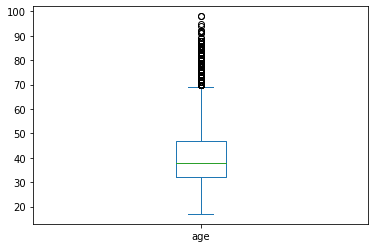

In [ ]:
data.age.plot(kind="box") # Données aberrantes

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [18]:
data_numeric = data[["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]]

Min=data_numeric.min()
Max=data_numeric.max()
Q1=data_numeric.quantile(0.25)
Q3=data_numeric.quantile(0.75)
IQR=Q3-Q1
outliers_low=(Q1-1.5*IQR)
outliers_high=(Q3+1.5*IQR)

In [19]:
outliers_high

age                 69.5000
duration           644.5000
campaign             6.0000
pdays              999.0000
previous             0.0000
emp.var.rate         6.2000
cons.price.idx      95.3725
cons.conf.idx      -26.9500
euribor3m           10.3865
nr.employed       5421.6000
dtype: float64

In [20]:
outliers_low

age                  9.5000
duration          -223.5000
campaign            -2.0000
pdays              999.0000
previous             0.0000
emp.var.rate        -6.6000
cons.price.idx      91.6965
cons.conf.idx      -52.1500
euribor3m           -4.0815
nr.employed       4905.6000
dtype: float64

In [21]:
((data_numeric<outliers_low) | (data_numeric>outliers_high)) # condition 1 ou condition 2

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
41183,True,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False


In [22]:
((data_numeric<outliers_low) | (data_numeric>outliers_high)).sum(axis=0)

age                469
duration          2963
campaign          2406
pdays             1515
previous          5625
emp.var.rate         0
cons.price.idx       0
cons.conf.idx      447
euribor3m            0
nr.employed          0
dtype: int64

In [23]:
((data_numeric<outliers_low) | (data_numeric>outliers_high)).sum(axis=1) # nombre d'outliers sur chaque ligne

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    0
41187    2
Length: 41188, dtype: int64

In [ ]:
((data<outliers_low) | (data>outliers_high)).sum(axis=0).sum()/nb_data*100 # 1,55% des valeurs sont aberrantes

C:\Users\theob\AppData\Local\Temp/ipykernel_8056/1195779720.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((data<outliers_low) | (data>outliers_high)).sum(axis=0).sum()/nb_data*100 #1,55% des valeurs sont abérrantes


1.552116427808377

# Stats générales

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
taux_de_dispersion=(data.std()/data.mean()*100).sort_values()
taux_de_dispersion  # >50% dispersée sinon homogène

C:\Users\theob\AppData\Local\Temp/ipykernel_8056/4072602556.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  taux_de_dispersion=(data.std()/data.mean()*100).sort_values()


cons.conf.idx      -11.426915
cons.price.idx       0.618580
nr.employed          1.398317
pdays               19.419810
age                 26.037463
euribor3m           47.895833
duration           100.384939
campaign           107.883690
previous           286.131186
emp.var.rate      1918.483405
dtype: float64

In [24]:
data.replace({'y': {'yes': 1, 'no': 0}})

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [86]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<AxesSubplot:>

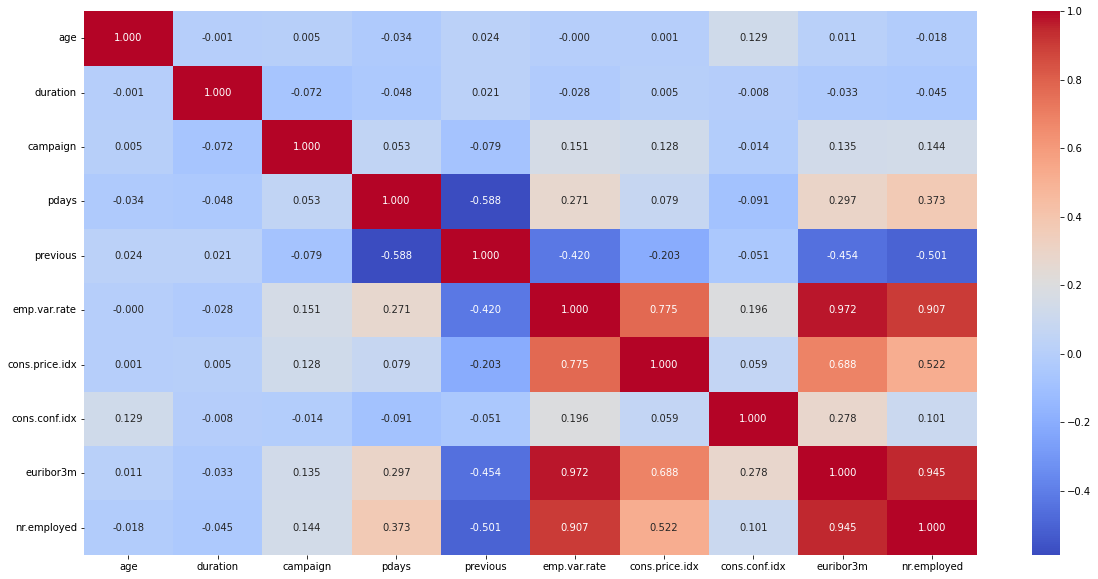

In [77]:
f, ax = plt.subplots(figsize=(20, 10))   

sns.heatmap(data.corr(),annot=True,fmt="1.3f",cmap='coolwarm')

In [25]:
(data.skew(numeric_only=True)-0).sort_values()

pdays            -4.922190
nr.employed      -1.044262
emp.var.rate     -0.724096
euribor3m        -0.709188
cons.price.idx   -0.230888
cons.conf.idx     0.303180
age               0.784697
duration          3.263141
previous          3.832042
campaign          4.762507
dtype: float64

## Recherche du meilleur modèle
Les classes ci-dessous permettent d'ajouter l'heure aux lignes affichées dans la console

In [27]:
class StdOutCapture(list):
    def __enter__(self):
        self._orig_stdout = sys.stdout
        sys.stdout = ShellClock(self._print)

        return self

    def _print(self, text):
        self._orig_stdout.write(text)

    def __exit__(self, *args):
        sys.stdout = self._orig_stdout


class ShellClock(object):
    def __init__(self, stdout_write):
        self._orig_write = stdout_write

    def write(self, text):
        if text.strip():
            if text.startswith("\n"):
                self._orig_write("\n")
                text = text.lstrip("\n")

            self._orig_write(f"{Fore.GREEN}{datetime.now().strftime('%H:%M:%S')} >>>{Fore.RESET} {text}\n")

Sépare le jeu de données en jeu d'entraînement et de test

In [29]:
model_data = data.drop(["duration"], axis=1)
x_train, x_test, y_train, y_test = utils.dataframe.split_train_test(model_data, y_label="y")
print(f"Données d'entraînement : {Fore.LIGHTGREEN_EX}{x_train.shape}{Fore.RESET}")
print(f"Données de test : {Fore.LIGHTGREEN_EX}{x_test.shape}{Fore.RESET}")

Données d'entraînement : (32950, 19)
Données de test : (8238, 19)


Transforme les colonnes.

In [30]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
# ranking_transformer = Pipeline(steps=[
#    ("imputer", SimpleImputer(strategy="constant")),
#    ("encoder", OrdinalEncoder())
# ])

numeric_features = [
    "age", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m",
    "nr.employed"
]
categorical_features = [
    "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"
]
# ranking_features = ["education"]

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features),
        ("categorical", categorical_transformer, categorical_features),
        # ("ranking", ranking_transformer, ranking_features)
    ]
)

Trouve le meilleur modèle avec les meilleurs paramètres

In [ ]:
models = {
    "k_neighbors_classifier": {
        "model": KNeighborsClassifier(),
        "is_regression": False,
        "hyper_params": {
            "n_neighbors": np.arange(1, 20),
            "metric": ["euclidean", "manhattan", "minkowski"]
        }
    },
    "k_neighbors_regressor": {
        "model": KNeighborsRegressor(),
        "is_regression": True,
        "hyper_params": {
            "n_neighbors": np.arange(1, 20),
            "metric": ["euclidean", "manhattan", "minkowski"]
        }
    },
    "logistic_regression": {
        "model": LogisticRegression(),
        "is_regression": True,
        "hyper_params": {
            "solver": ["sag", "saga", "newton-cg", "lbfgs"],
            "max_iter": np.arange(100, 200)
        }
    },
    "linear_regression": {
        "model": LinearRegression(),
        "is_regression": True,
        "hyper_params": None
    },
    "linear_discriminant_analysis": {
        "model": LinearDiscriminantAnalysis(),
        "is_regression": False,
        "hyper_params": {
            "solver": ["svd", "lsqr", "eigen"]
        }
    },
    "tree_classifier": {
        "model": DecisionTreeClassifier(),
        "is_regression": False,
        "hyper_params": {
            "criterion": ["gini", "entropy"],
            "min_samples_split": np.arange(2, 3)
        }
    },
    "tree_regressor": {
        "model": DecisionTreeRegressor(),
        "is_regression": True,
        "hyper_params": {
            "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
            "min_samples_split": np.arange(2, 3)
        }
    },
    "svc": {
        "model": SVC(),
        "is_regression": False,
        "hyper_params": {
            "kernel": ["linear", "poly", "rbf", "sigmoid", "precomputed"]
        }
    },
    "linear_svc": {
        "model": LinearSVC(),
        "is_regression": False,
        "hyper_params": {
            "loss": ["hinge", "squared_hinge"]
        }
    },
}

models_ranking = []

with StdOutCapture() as output:
    for model_key in models:
        # Start model processing
        model_start = timer()
        model_infos = models[model_key]

        # Get model
        print(f"{Fore.LIGHTBLUE_EX}Traitement du jeu de données avec un modèle \"{model_key}\"...")
        pipeline = Pipeline(steps=[
            ("preprocessor", preprocessor),
            (model_key, model_infos["model"])
        ])

        # Models based on regression are not working due to some operations between strings and numbers,
        # even with the preprocessor. sad story.
        if model_infos["is_regression"]:
            print(f"{Fore.YELLOW}Le modèle est ignoré dû à un bug avec les modèles régressifs. déso bro.")
            continue

        # Process
        if model_infos["is_regression"]:
            model, scores = utils.model.process_regression_model(
                pipeline,
                x_train=x_train, y_train=y_train,
                x_test=x_test, y_test=y_test,
                verbose=True
            )
        else:
            model, scores = utils.model.process_model(
                pipeline,
                x_train=x_train, y_train=y_train,
                x_test=x_test, y_test=y_test,
                verbose=True
            )

        utils.model.print_scores(scores)

        # Try to find better params, if possible
        if model_infos["hyper_params"] is not None:
            print(f"Recherche des meilleurs paramètres avec GridSearch...")
            grid = GridSearchCV(
                pipeline,
                {f"{model_key}__{k}": v for k, v in model_infos["hyper_params"].items()},
                verbose=2
            )
            model, scores = utils.model.best_model(
                model, is_regression=model_infos["is_regression"], search=grid,
                x_train=x_train, y_train=y_train,
                x_test=x_test, y_test=y_test,
                scores=scores
            )

        # Send the best model into the ranking array
        scores_mean = round((scores["train"] + scores["test"]) / 2, 2)
        model_end = timer()
        model_elapsed_time = timedelta(seconds=model_end - model_start)

        models_ranking.append({
            "name": model_key, "mean": scores_mean, "model": model, "processing_time": model_elapsed_time
        })

        # Prints the duration of the model computation
        print(f"{Fore.LIGHTBLUE_EX}Terminé en {model_elapsed_time}.\n")

Affiche le résultat

In [ ]:
# Suggests a model from means
models_ranking.sort(key=lambda dic: dic["mean"], reverse=True)
best_model = models_ranking[0]

print((
    f"{Fore.GREEN}Selon les scores d'entraînement et de test uniquement"
    f", le meilleur modèle semble être \"{best_model['name']}\".\n"
    f"Il a atteint un score moyen de {best_model['mean']}% en {best_model['processing_time']}.\n"
    f"{Fore.RESET}Pensez à vérifier les autres statistiques avant de sélectionner un modèle."
))